In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Functions

In [18]:
def generate_samples(x,pts):
    # compute the measurement matrix
    x0  = np.ones((pts, 1))
    x1 = x
    x2 = x1**2
    x3 = x1**3
    x5 = x1**5
    X = np.hstack((x0, x1, x2, x3, x5))
    return X
    
def plotting(N,a,b,theta,l,sigma_theta,sigma_n,z):
    
    # generate samples
    x = np.array([np.linspace(a, b, N)]).T
    y = theta_original[0] + theta_original[1]*x + theta_original[2]*x**2 + theta_original[3]*x**3 + theta_original[4]*x**5
    X1 = np.array([np.linspace(a, b, N)]).T
    Phi=generate_samples(X1,N)

    # noise generation
    n = math.sqrt(sigma_n) * np.random.randn(N,1)

    # generate noisy observations using the linear model
    y1 = np.dot(Phi, theta_original) + n

    # set the parameters of Gaussian prior
    mu_theta_prior = theta # or mu_theta_prior = random theta;
    # compute the covariance matrix of the Gaussian posterior
    Sigma_theta_pos = np.linalg.inv((sigma_theta**-1) * np.eye(l) + (sigma_n**-1) * np.dot(Phi.T, Phi))
    # compute the posterior mean
    mu_theta_pos = mu_theta_prior + (sigma_n**-1) * np.dot(np.dot(Sigma_theta_pos, Phi.T), (y1-np.dot(Phi, mu_theta_prior)))

    # linear prediction
    X1_pred = (b-a) * np.random.rand(N, 1)
    Phi_pred=generate_samples(X1_pred,N)

    # compute the predicted mean and variance
    mu_y_pred = np.dot(Phi_pred, mu_theta_pos)
    sigma_y_pred = np.diag(sigma_n + sigma_n * sigma_theta * np.dot(np.dot(Phi_pred,np.linalg.inv(sigma_n * np.eye(l) + sigma_theta * np.dot(Phi.T, Phi))),Phi_pred.T))


    # plot the predictions along the condifence intervals
    fig = plt.figure(figsize = (10, 5))
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    plt.plot(x, y, 'k', label = 'actual function')
    plt.plot(X1, y1, 'bo', label = 'noisy samples')
    plt.plot(X1_pred, mu_y_pred, 'gx', label = 'mean values predicted')
    plt.errorbar(X1_pred, mu_y_pred, np.sqrt(sigma_y_pred), fmt='r.', capsize=5,label = 'error')
    plt.title("N =%f" %N + "\n sigma_theta=%f" %sigma_theta + "\n sigma_n=%f" %sigma_n + "\n mean theta prior=%s" %z)
    plt.legend(loc = 0)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Part i and ii

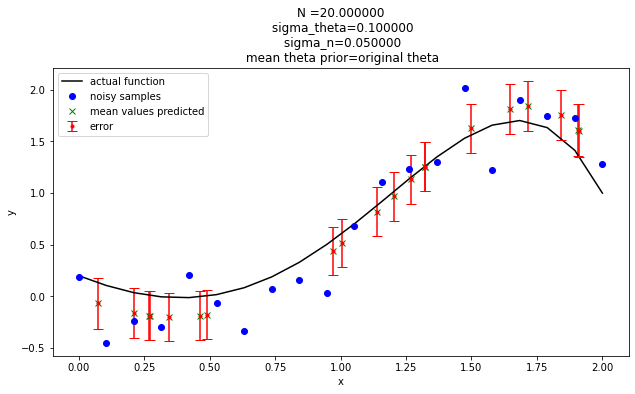

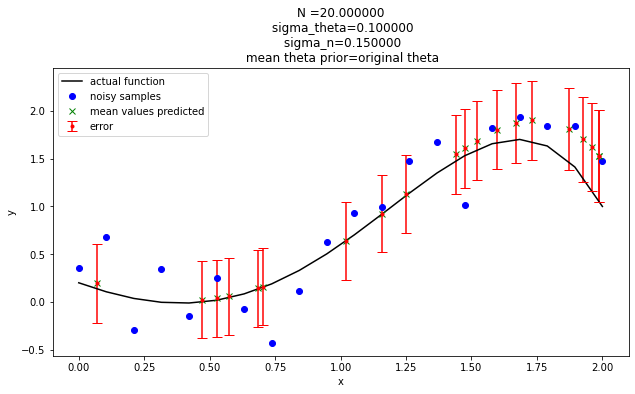

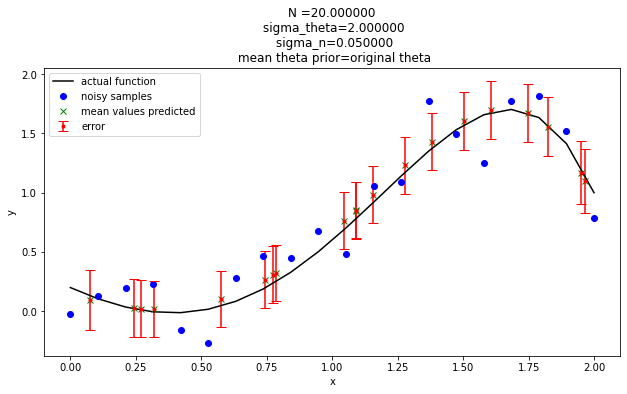

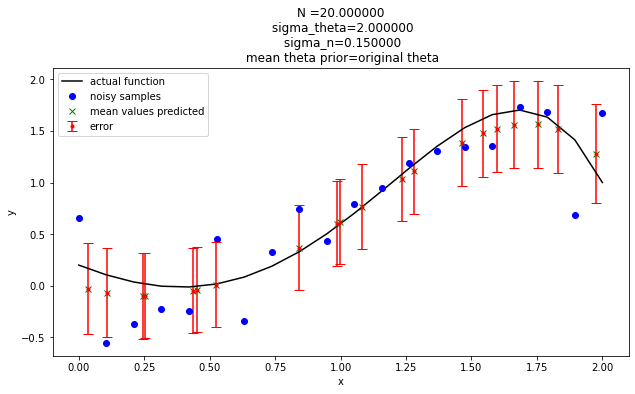

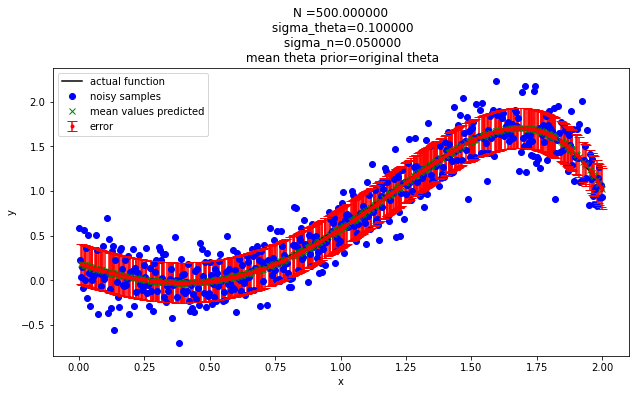

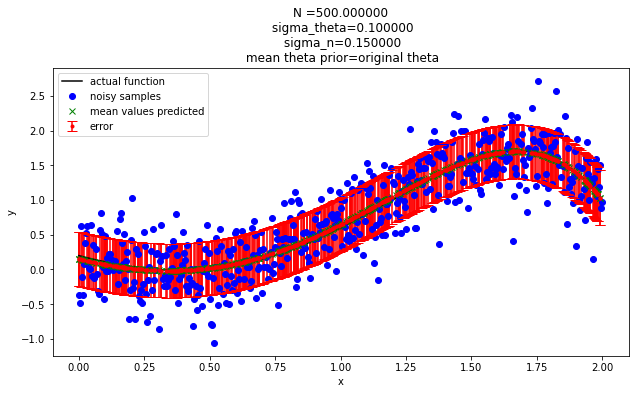

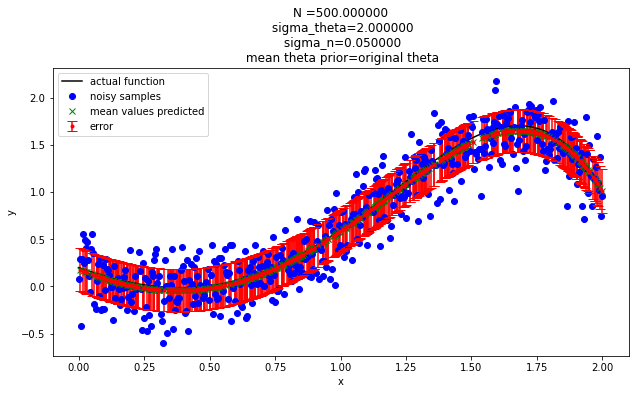

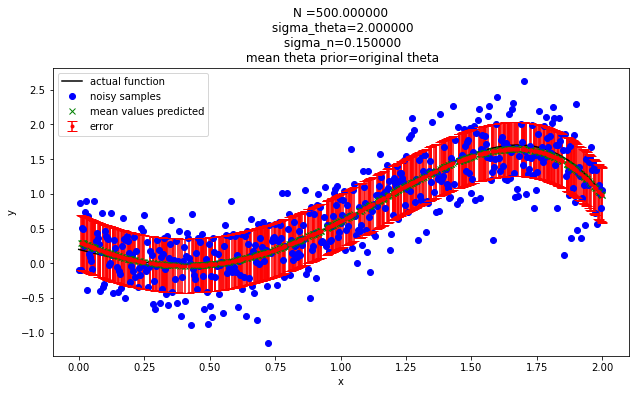

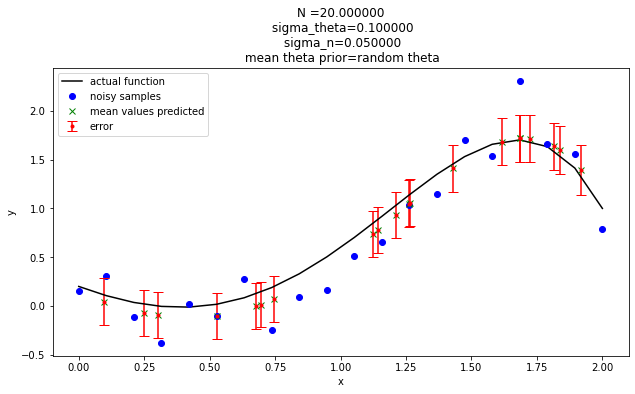

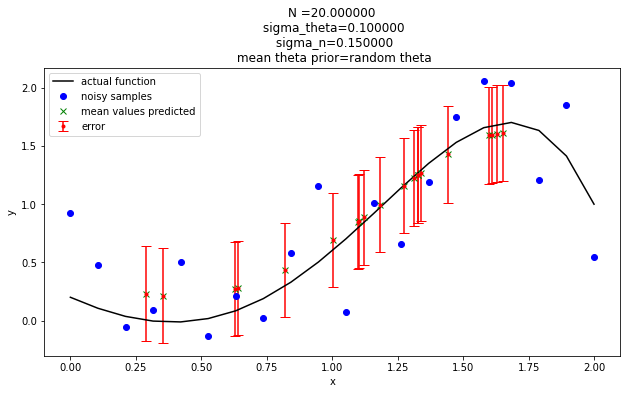

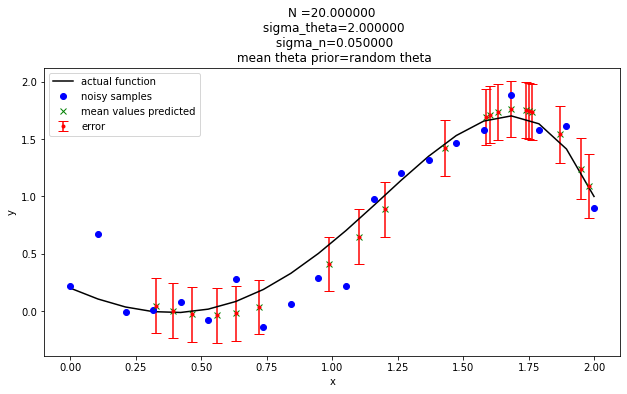

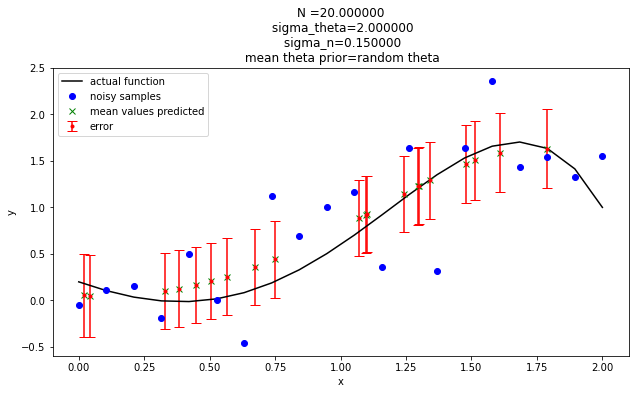

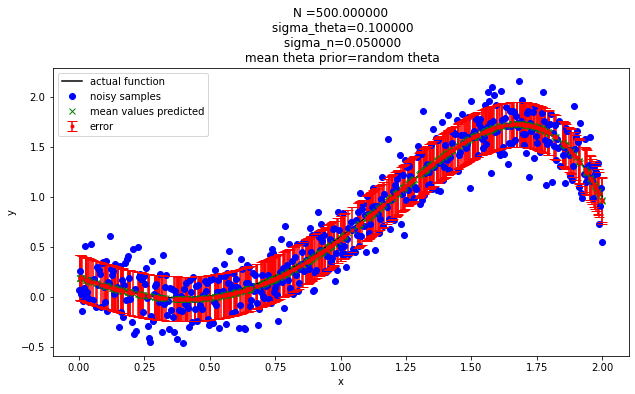

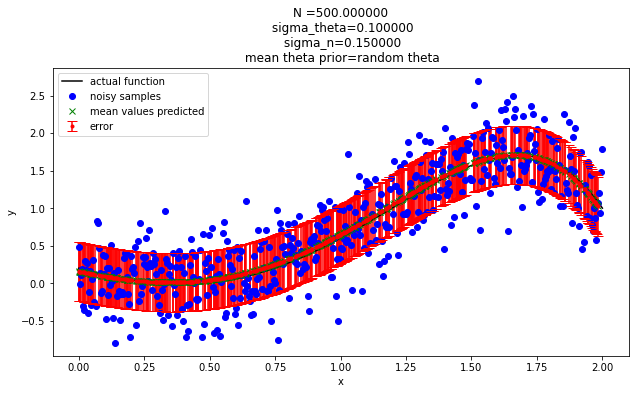

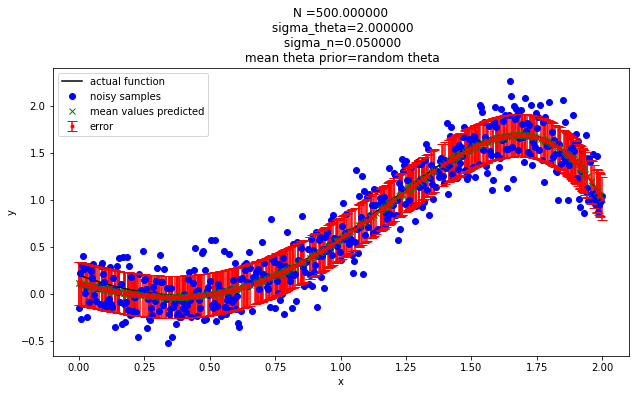

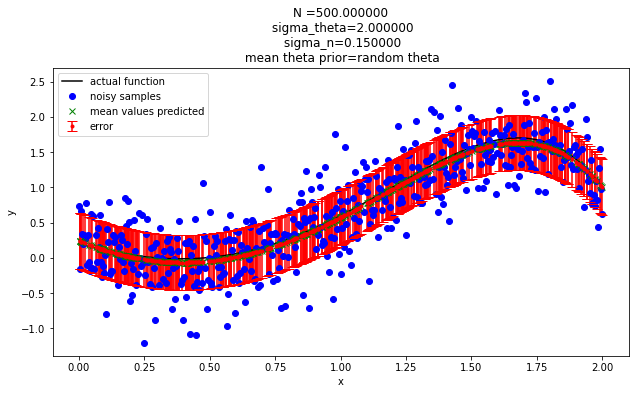

In [19]:
# training samples (20 or 500)
N = np.array([20,500])
np.random.seed(500)
# sample interval [a b]
a = 0;b = 2
sigma_n = np.array([0.05,0.15])
# use the true theta or random
theta_original = np.array([[0.2], [-1], [0.9], [0.7], [-0.2]])
theta_dstrbd = 2*np.array(np.random.rand(1,5)).T - 1
theta = np.array([theta_original,theta_dstrbd]) # original and random theta stored in an array
l = theta.shape[1]
sigma_theta = np.array([0.1,2])

for i in range(len(theta)):               # Changing value theta from original to random theta after 8 plots
    for j in range(len(N)):               # Changing number of training samples after every 4 plots
        for k in range(len(sigma_theta)): # Changing value of sigma theta after every 2 plots
            for L in range(len(sigma_n)): # Changing value of sigma noise in every plot
                if (i==0):
                    z = "original theta"
                    modified = plotting(N[j],a,b,theta[i],l,sigma_theta[k],sigma_n[L],z) # calling computation function
                else:
                    z = "random theta"
                    modified = plotting(N[j],a,b,theta[i],l,sigma_theta[k],sigma_n[L],z)

# Comments:

***1. When noise variance is increased, we see that overall noise is increased and so error bars are increased, confidence intervals are also increased. Higher confidence level generates a wider (i.e., less precise) confidence interval.***

***2. Chaninging theta mean prior will affect our predictions, when mean of theta prior is chosen randomly to fit the data it shows that the predictions don't fit the data properly, mean values predicted do not follow actual function accurately.***

***3. Increasing sigma (variance) of theta will also gives wider confidence intervals.***